# Boston Crime Dataset


## Import Libraries <a class="anchor" id="import-libraries"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import folium
from folium.plugins import HeatMap
import zipfile

## Load Datasets

In [2]:
with zipfile.ZipFile('input/crime.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('input')

crime_data = pd.read_csv("input/crime.csv", engine='python')

## Basis Analysis

In [3]:
crime_data.dtypes

INCIDENT_NUMBER         object
OFFENSE_CODE             int64
OFFENSE_CODE_GROUP      object
OFFENSE_DESCRIPTION     object
DISTRICT                object
REPORTING_AREA          object
SHOOTING                object
OCCURRED_ON_DATE        object
YEAR                     int64
MONTH                    int64
DAY_OF_WEEK             object
HOUR                     int64
UCR_PART                object
STREET                  object
Lat                    float64
Long                   float64
Location                object
dtype: object

In [4]:
crime_data.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 2146
REPORTING_AREA              0
SHOOTING               415383
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                  109
STREET                  12233
Lat                     27378
Long                    27378
Location                    0
dtype: int64

In [5]:
crime_data.SHOOTING.value_counts()

Y    1723
Name: SHOOTING, dtype: int64

In [6]:
crime_data.SHOOTING.fillna('N', inplace=True)
crime_data.SHOOTING.replace({'Y':True, 'N':False}, inplace=True)

In [7]:
crime_data.SHOOTING.value_counts(dropna=False)

False    415383
True       1723
Name: SHOOTING, dtype: int64

In [8]:
crime_data.STREET.value_counts(dropna=False)

WASHINGTON ST          18869
NaN                    12233
BLUE HILL AVE          10347
BOYLSTON ST             9329
DORCHESTER AVE          6584
TREMONT ST              6461
HARRISON AVE            6237
MASSACHUSETTS AVE       6204
CENTRE ST               5773
COMMONWEALTH AVE        5394
HYDE PARK AVE           4635
COLUMBIA RD             4227
HUNTINGTON AVE          3911
RIVER ST                3798
DUDLEY ST               3258
COLUMBUS AVE            3067
WARREN ST               2989
ADAMS ST                2670
NEWBURY ST              2534
BEACON ST               2530
CAMBRIDGE ST            2262
BOWDOIN ST              2237
AMERICAN LEGION HWY     2160
GENEVA AVE              2073
W BROADWAY              2073
ALBANY ST               1988
ALLSTATE RD             1722
SUMMER ST               1710
NEW SUDBURY ST          1630
BORDER ST               1593
                       ...  
LANSDOWNE                  1
WOODBINE                   1
GUEST                      1
NEW ENGLAD    

In [9]:
crime_data.INCIDENT_NUMBER.value_counts()

I152071596       20
I172053750       18
I192025403       15
I182051210       14
I162067346       14
I162030584       13
I130041200-00    13
I162045234       12
I182093742       12
I192008813       12
I152097957       12
I182044546       12
I192062990       11
I130194606-00    11
I152080623       11
I070720870-00    11
I152054787       10
I172013170       10
I192003542       10
I162101004       10
I182093874       10
I182058835       10
I192009132       10
I182037657       10
I182065208       10
I172096394       10
I172105110       10
I162098170        9
I172056883        9
I162071327        9
                 ..
I152071205        1
I192048876        1
I152071992        1
I182036997        1
I172093263        1
I172009495        1
I182083620        1
I162083155        1
I162053193        1
I172030845        1
I172022615        1
I182024534        1
I172016186        1
I172084971        1
I182042540        1
I162026873        1
I152077518        1
I172022230        1
I162051710        1


In [10]:
crime_data.loc[1]

INCIDENT_NUMBER                         I192068458
OFFENSE_CODE                                  3112
OFFENSE_CODE_GROUP        Landlord/Tenant Disputes
OFFENSE_DESCRIPTION      LANDLORD - TENANT SERVICE
DISTRICT                                       C11
REPORTING_AREA                                 336
SHOOTING                                     False
OCCURRED_ON_DATE               2019-08-28 20:53:00
YEAR                                          2019
MONTH                                            8
DAY_OF_WEEK                              Wednesday
HOUR                                            20
UCR_PART                                Part Three
STREET                                   NORTON ST
Lat                                        42.3063
Long                                      -71.0686
Location               (42.30626521, -71.06864556)
Name: 1, dtype: object

In [11]:
crime_data.loc[1].Location

'(42.30626521, -71.06864556)'

In [12]:
crime_data[crime_data.INCIDENT_NUMBER == "I192009132"].head(3).T

,55846,55847,55848
INCIDENT_NUMBER,I192009132,I192009132,I192009132
OFFENSE_CODE,1841,111,2010
OFFENSE_CODE_GROUP,Drug Violation,Homicide,HOME INVASION
OFFENSE_DESCRIPTION,DRUGS - POSS CLASS A - INTENT TO MFR DIST DISP,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",HOME INVASION
DISTRICT,D4,D4,D4
REPORTING_AREA,273,273,273
SHOOTING,True,True,True
OCCURRED_ON_DATE,2019-02-04 12:35:00,2019-02-04 12:35:00,2019-02-04 12:35:00
YEAR,2019,2019,2019
MONTH,2,2,2


In [13]:
crime_data.INCIDENT_NUMBER.unique().__len__()

367158

In [14]:
crime_data.INCIDENT_NUMBER.count()

417106

In [15]:
crime_data.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

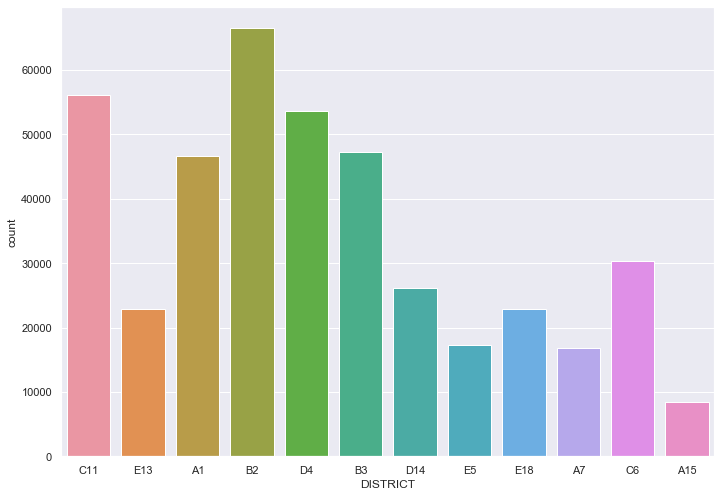

In [22]:
sns.countplot(data=crime_data,
              x='DISTRICT'
             )

In [23]:
crime_data.DISTRICT.value_counts()

B2     66506
C11    56172
D4     53707
B3     47210
A1     46659
C6     30321
D14    26125
E18    22852
E13    22814
E5     17338
A7     16781
A15     8475
Name: DISTRICT, dtype: int64

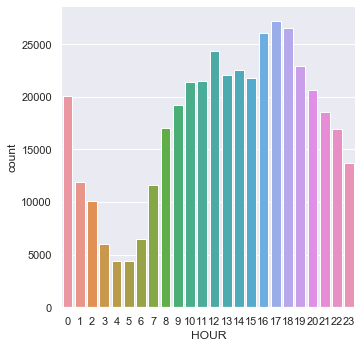

In [24]:
sns.catplot(x='HOUR',
           kind='count',
           data=crime_data)

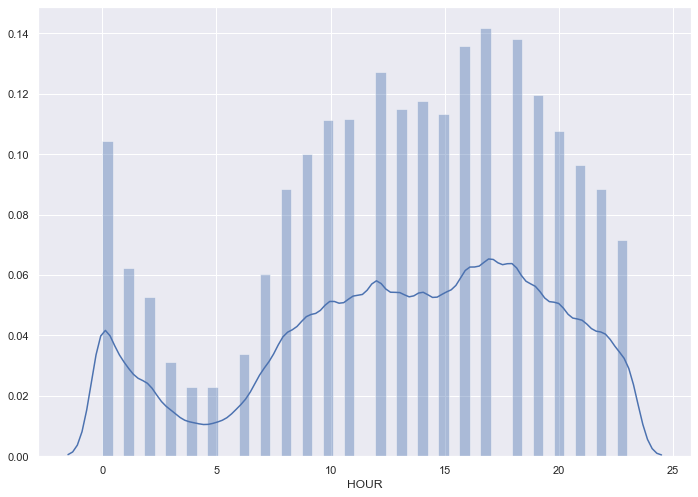

In [25]:
sns.distplot(crime_data['HOUR'])

In [26]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


In [27]:
min(crime_data.OCCURRED_ON_DATE)

'2015-06-15 00:00:00'

In [28]:
max(crime_data.OCCURRED_ON_DATE)

'2019-08-28 21:00:00'

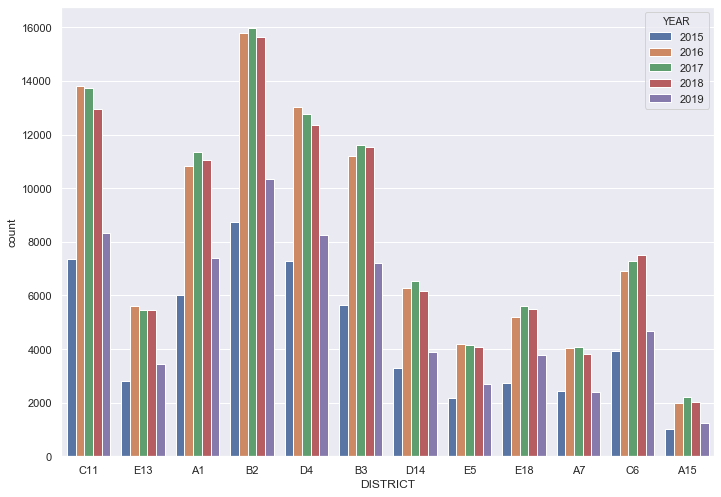

In [29]:
sns.countplot(data=crime_data,
              x='DISTRICT',
              hue='YEAR')

In [30]:
crime_data = crime_data[crime_data["YEAR"].isin([2016,2017,2018])]

In [31]:
crime_data.YEAR.value_counts(dropna=False)

2017    101317
2016     99415
2018     98808
Name: YEAR, dtype: int64

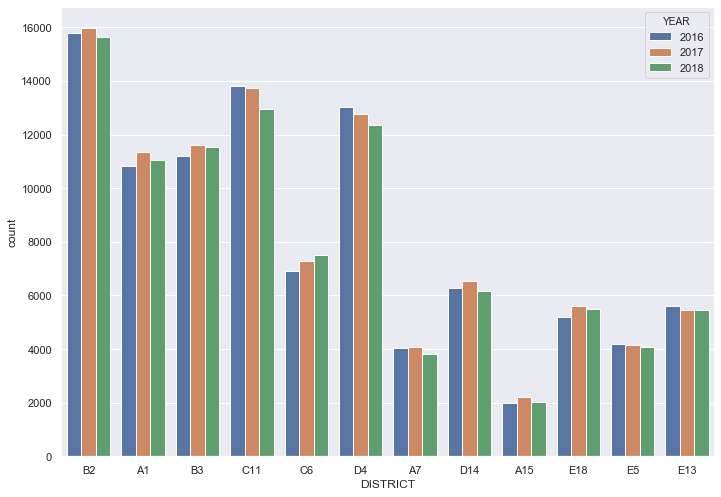

In [32]:
sns.countplot(data=crime_data,
              x='DISTRICT',
              hue='YEAR')

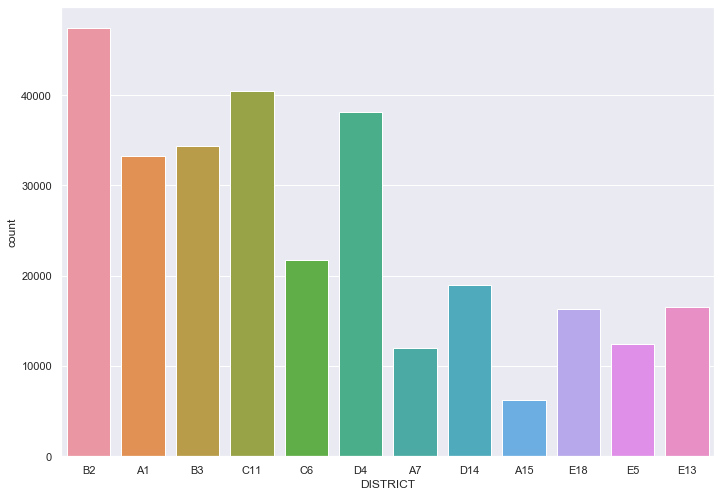

In [33]:
sns.countplot(data=crime_data,
              x='DISTRICT')

In [34]:
crime_data.DISTRICT.value_counts()

B2     47424
C11    40492
D4     38153
B3     34353
A1     33239
C6     21713
D14    18967
E13    16550
E18    16329
E5     12451
A7     11949
A15     6218
Name: DISTRICT, dtype: int64

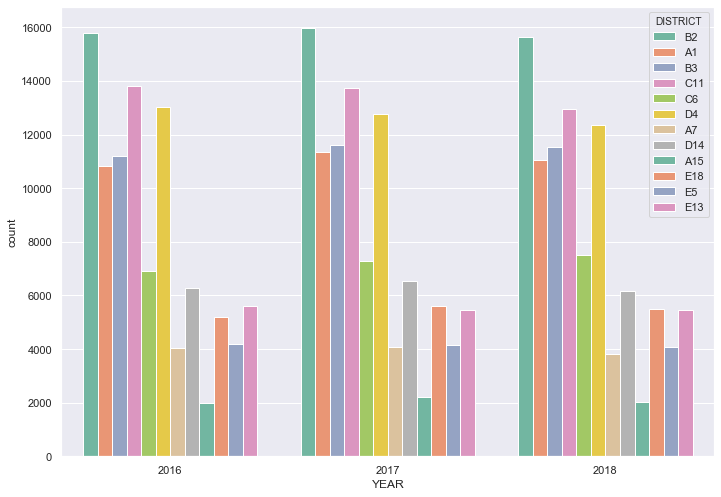

In [35]:
sns.countplot(data=crime_data,
              x='YEAR',
              hue='DISTRICT', palette="Set2")

In [36]:
crime_data.groupby(['DISTRICT', 'YEAR']).size().unstack(fill_value=0)

YEAR,2016,2017,2018
DISTRICT,,,
A1,10839,11358,11042
A15,1990,2195,2033
A7,4055,4094,3800
B2,15805,15972,15647
B3,11202,11596,11555
C11,13801,13734,12957
C6,6922,7297,7494
D14,6275,6538,6154
D4,13019,12761,12373


In [37]:
len(crime_data)

299540

In [38]:
crime_data.__len__()

299540

## Map Plotting <a class="anchor" id="map"></a>

In [3]:
crime_map = folium.Map(location=[42.3125,-71.0875], 
                       tiles = "Stamen Toner",
                       zoom_start = 11)
data_heatmap = crime_data[crime_data.YEAR == 2018]
data_heatmap = crime_data[['Lat','Long']]
data_heatmap = crime_data.dropna(axis=0, subset=['Lat','Long'])
data_heatmap = [[row['Lat'],row['Long']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(crime_map)
crime_map.save("output/boston_crime_map.html")